# Analiza danych w języku Python - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika. Wyjątek stanowi ostatni z projektów, gdzie po konsultacji z prowadzącym zajęcia możliwa jest większa swoboda w doborze pakietów.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/>
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/>
`YOUR ANSWER HERE`<br/>
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

## Zestaw zadań 4: Wstęp do analizy danych przestrzennych (Notatnik 1/2)

In [36]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os

In [37]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

### Zadanie 1: Import i przygotowanie danych (9 pkt)

Wykorzystując funkcję `geopandas.read_file()` zaimportuj do notatnika dane z załączonych do niego plików i przygotuj na ich podstawie cztery tablice zawierające wybrane dane dotyczące dwóch rzek - Wisły i Odry, miast, powiatów oraz województw.

Wyświetl przygotowane tablice i zapisz je do pliu `data.gpkg` na warstwy o nazwach odpowiadające nazwom zmiennych.

Uwagi do wykonania zadania:
 - Pliki zawierają więcej danych niż wynikowe tablice, w których nie powinny znaleźć się zbędne dane.
 - Poprawny import polskich nazw może wymagać ustawienia odpowiedniej wartości parametru `encoding` (w zależności od pliku utf-8 lub 1250) podczas wywoływania funkcji `geopandas.read_file()`.
 - Dane są zapisane z wykorzystaniem różnych odwzorowań kartograficznych. Przed rozpoczęciem analizy należy je ze sobą uzgodnić. Korzystając z własności obiektu GeoDataFrame `geopandas.GeoDataFrame.crs` sprawdź odwzorowanie kartograficzne, w którym zapisane są dane. Jeżeli odwzorowanie jest inne niż epsg:2180 dokonaj jego konwersji z wykorzystaniem funkcji `geopandas.GeoDataFrame.to_crs()`.

#### a)  Rzeki

Tablica `rivers` zawierająca wyłącznie następujące elementy:</br>

> Indeks:</br>
> Domyślny indeksowanie tablicy

> Kolumny: Nazwa, geometry</br>
> Kolumny zawierające nazwę oraz geometrię obiektów

W tablicy zawrzyj wyłącznie informacje dotyczące dwóch rzek - Wisły i Odry.

In [38]:
# Rzeki
rivers = gpd.read_file('Rzeki.shp')
#data.head()
rivers = rivers[rivers['NAZ_RZEKI'].isin(['Wisła', 'Odra'])]
rivers.to_crs(epsg=2180, inplace=True)
rivers.drop('RZAD', axis=1, inplace=True)
rivers.columns = ['Nazwa', 'geometry']
rivers

,Nazwa,geometry
0,Odra,"MULTILINESTRING ((393160.062 195086.116, 39323..."
1,Wisła,"MULTILINESTRING ((500265.481 193171.33, 500244..."


In [39]:
# Komórka testowa
assert type(rivers) == gpd.geodataframe.GeoDataFrame
assert rivers.shape == (2, 2)
assert list(rivers.columns) == ['Nazwa', 'geometry']
assert rivers.crs == "epsg:2180"

#### b) Miasta

Tablica `cities` zawierająca wyłącznie następujące elementy:</br>

> Indeks:</br>
> Domyślny indeksowanie tablicy

> Kolumny: Nazwa, geometry</br>
> Kolumny zawierające nazwę oraz geometrię obiektów

W tablicy zawrzyj wyłącznie informacje dotyczące miast jako całości, pomiń wsie, dzielnice itp.

In [40]:
# Miasta
cities = gpd.read_file('Miejscowosci.shp')
cities.to_crs(epsg=2180, inplace=True)
cities = cities[cities['rodzaj'] == 'miasto']
cities = cities[['nazwaGlown', 'geometry']]
cities.columns = ['Nazwa', 'geometry']
cities

,Nazwa,geometry
325,Aleksandrów Kujawski,POINT (479373.05 556833.54)
326,Aleksandrów Łódzki,POINT (520933.51 439274.23)
390,Alwernia,POINT (538609.78 243752.61)
447,Andrychów,POINT (524250.26 220924.61)
580,Annopol,POINT (700882.16 339274.92)
...,...,...
101357,Żuromin,POINT (561072.6 578091.43)
101387,Żychlin,POINT (542758.37 486616.29)
101460,Żyrardów,POINT (599274.6 466617.82)
101497,Żywiec,POINT (513848.05 201968.41)


In [41]:
# Komórka testowa
assert type(cities) == gpd.geodataframe.GeoDataFrame
assert cities.shape == (964, 2)
assert list(cities.columns) == ['Nazwa', 'geometry']
assert cities.crs == "epsg:2180"

#### c) Powiaty

Tablica `districts` zawierająca wyłącznie następujące elementy:</br>

> Indeks:</br>
> Domyślny indeksowanie tablicy

> Kolumny: Nazwa, geometry</br>
> Kolumny zawierające nazwę oraz geometrię obiektów

In [42]:
# Powiaty
districts = gpd.read_file('data.shp')
districts = districts[['pow', 'geometry']]
districts.columns = ['Nazwa', 'geometry']
districts

,Nazwa,geometry
0,ropczycko-sędziszowski,"POLYGON ((692305.365 260282.248, 692313.646 26..."
1,łosicki,"POLYGON ((753920.175 497017.076, 753918.822 49..."
2,piaseczyński,"POLYGON ((644442.384 473992.041, 644345.678 47..."
3,radomski,"POLYGON ((638056.482 404421.246, 638059.412 40..."
4,sierpecki,"POLYGON ((534236.749 555932.727, 534235.027 55..."
...,...,...
375,nowodworski,"POLYGON ((521445.985 722541.335, 521523.278 72..."
376,jaworski,"POLYGON ((303544.254 353195.337, 303547.016 35..."
377,węgrowski,"POLYGON ((702854.223 532567.782, 702853.911 53..."
378,wejherowski,"POLYGON ((430377.866 773965.783, 430351.853 77..."


In [43]:
# Komórka testowa
assert type(districts) == gpd.geodataframe.GeoDataFrame
assert districts.shape == (380, 2)
assert list(districts.columns) == ['Nazwa', 'geometry']
assert districts.crs == "epsg:2180"

#### d) Województwa

Tablica `voivodeships` zawierająca wyłącznie następujące elementy:</br>

> Indeks:</br>
> Domyślny indeksowanie tablicy

> Kolumny: komplet kolumn z pliku `voivodeships_dane.csv` oraz przygotowana osobno kolumna geometry</br>
> Kolumny zawierające nazwę, dodatkowe inforamacje o obiektach oraz ich geometrię

Plik `voivodeships_dane.csv` nie zawiera geometrii obiektów. W związku z tym należy go wczytać z wykorzystaniem funkcji `pandas.read_csv()`, a geometrię obiektów przygotować osobno, korzystając z funkcji `geopandas.GeoDataFrame.dissolve()`, w oparciu o dane zawarte w pliku `Powiaty.zip`.

In [44]:
powiaty = gpd.read_file('data.shp')
wojewodztwa = powiaty.dissolve(by='woj')
wojewodztwa = wojewodztwa['geometry']
wojewodztwa

,geometry
woj,
dolnośląskie,"POLYGON ((314611.15 311051.839, 314601.47 3110..."
kujawsko-pomorskie,"POLYGON ((478562.463 506967.539, 478548.952 50..."
lubelskie,"POLYGON ((741864.722 286667.036, 741870.576 28..."
lubuskie,"POLYGON ((229163.332 402782.45, 229144.276 402..."
mazowieckie,"POLYGON ((585701.782 466338.954, 585672.494 46..."
małopolskie,"POLYGON ((586410.706 163650.516, 586410.872 16..."
opolskie,"POLYGON ((432817.512 256749.768, 432795.398 25..."
podkarpackie,"POLYGON ((714304.962 168868.919, 714268.355 16..."
podlaskie,"POLYGON ((732344.671 544449.422, 732354.868 54..."


In [45]:
# Województwa
voivodeships = pd.read_csv('Wojewodztwa_dane.csv', sep=';')
voivodeships = voivodeships.merge(wojewodztwa, left_on='Nazwa', right_on=wojewodztwa.index)
voivodeships = gpd.GeoDataFrame(
    voivodeships, geometry='geometry')
voivodeships.to_crs(epsg=2180, inplace=True)
voivodeships.head()

Output hidden; open in https://colab.research.google.com to view.

In [46]:
# Komórka testowa
assert type(voivodeships) == gpd.geodataframe.GeoDataFrame
assert voivodeships.shape == (16, 13)
assert set(list(voivodeships.columns)) == set(['Nazwa',
                                             'geometry',
                                             'Powierzchnia ogółem [ha]',
                                             'Produkcja energii elektrycznej [GWh]',
                                             'Stosunek produkcji energii elektrycznej do zużycia energii elektrycznej [%]',
                                             'Udział energii odnawialnej w produkcji energii elektrycznej [%]',
                                             'Udział powierzchni gruntów pod wodami w powierzchni ogółem [%]',
                                             'Udział powierzchni nieużytków w powierzchni ogółem [%]',
                                             'Udział powierzchni terenów mieszkaniowych w powierzchni ogółem [%]',
                                             'Udział powierzchni terenów przemysłowych w powierzchni ogółem [%]',
                                             'Udział powierzchni terenów rekreacji i wypoczynku w powierzchni ogółem [%]',
                                             'Udział powierzchni użytków rolnych w powierzchni ogółem [%]',
                                             'Zużycie energii elektrycznej [GWh]'])
assert voivodeships.crs == "epsg:2180"

#### e) Zapisanie danych

Korzystając z funkcji `geopandas.GeoDataFrame.to_file()` zapisz dane z przygotowanych tablic do pliku `data.gpkg` na osobne warstwy o nazwach identycznych z nazwami zapisywanych zmiennych.

Znajdujący się w komórce kod usuwa już istniejący plik `data.gpkg`. Zapobiega to nadpisywaniu danych do już istniejącego pliku w kolejnych wykonaniach notatnika.

In [47]:
# Zapisanie danych do pliku
if os.path.exists("data.gpkg"):
    os.remove("data.gpkg")

rivers.to_file("data.gpkg", layer='rivers')
cities.to_file("data.gpkg", layer='cities')
districts.to_file("data.gpkg", layer='districts')
voivodeships.to_file("data.gpkg", layer='voivodeships')

In [48]:
# Komórka testowa
test_results = gpd.list_layers("data.gpkg")
assert test_results.shape == (4, 2)
assert np.all(set(test_results['name'].values) == set(['rivers', 'cities', 'districts', 'voivodeships']))
assert np.all(set(test_results['geometry_type'].values) == set(['MultiLineString', 'Point', 'MultiPolygon', 'MultiPolygon']))

### Zadanie 2: Wizualizacja danych wejściowych (2 pkt)

Korzystając z funkcji pakietu matplotlib oraz funkcji `geopandas.GeoDataFrame.plot()` zwizualizuj na pojedynczej mapie komplet przygotowanych danych (geometrie obiektów). Przygotuj wykres tak, aby:
 - powiaty posiadały wypełnienie w wybranym kolorze oraz granice oznaczone cienką linią w bardziej intensywnej wersji koloru ich wypełnienia,
 - granice województw były oznaczne grubszą linią w bardziej intensywnej wersji koloru granic powiatów,
 - rzeki i miasta były oznaczone kolorami wyróżniającymi się na tle oznaczeń powiatów i województw.

Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

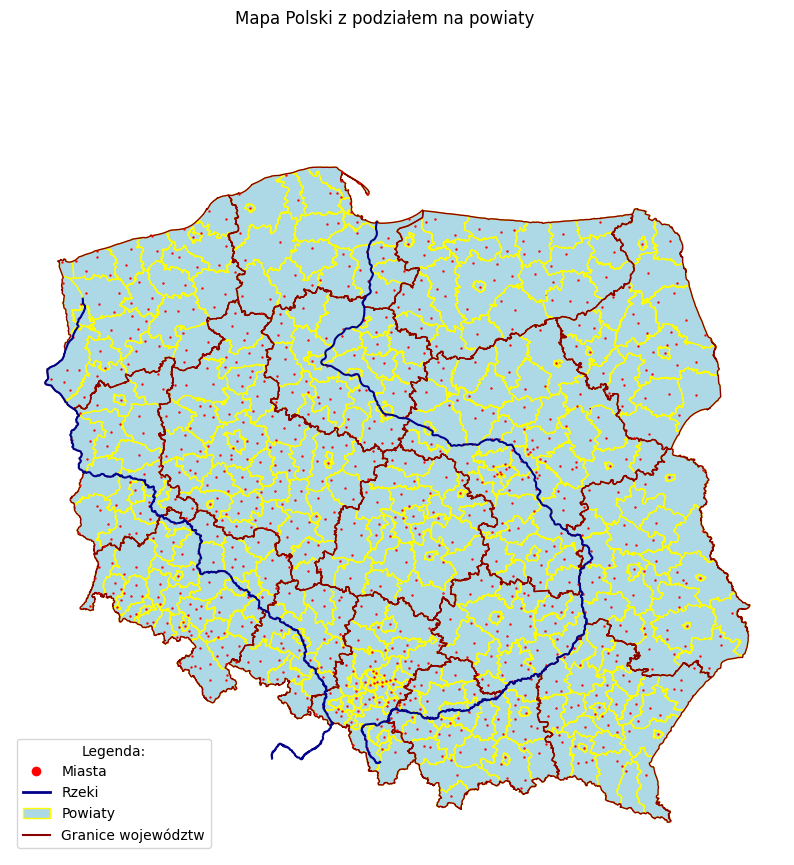

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
rivers.plot(ax=ax, color='darkblue')
districts.plot(ax=ax, facecolor='lightblue', linewidth=1, edgecolor='yellow')
voivodeships.plot(ax=ax, facecolor='none', edgecolor='darkred')
cities.plot(ax=ax, color='red', markersize=0.5)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Miasta',
           markerfacecolor='red', markersize=8),
    Line2D([0], [0], color='darkblue', lw=2, label='Rzeki'),
    Patch(facecolor='lightblue', edgecolor='yellow', label='Powiaty'),
    Line2D([0], [0], color='darkred', lw=1.5, label='Granice województw')
]

# Dodanie legendy
ax.legend(handles=legend_elements,
          loc='lower left',
          frameon=True,
          framealpha=0.8,
          title='Legenda:')


ax.set_axis_off()
plt.suptitle('Mapa Polski z podziałem na powiaty')
plt.show()

### Zadanie 3: Mierzenie długości, pola powierzchni i odległości (7 pkt)

#### a) Długość Wisły
Korzystając z własności `geopandas.GeoSeries.length` zmierz długość Wisły w metrach oraz:
 - zapisz wynik do zmiennej `length`,
 - korzystając z funkcji `print()` wyświetl odpowiedź (pełnym zdaniem) na pytanie o długość Wisły podając odpowiedź w kilometrach z dokładnością do 3 miejsc po przecinku.

In [50]:
length = rivers[rivers['Nazwa'] == 'Wisła']['geometry'].length
length

,0
1,1.019758e+06


In [51]:
# Komórka testowa
assert np.isclose(length, 1019757.7991167122)

#### b) Pola powierzchni województw
Korzystając z własności `geopandas.GeoSeries.area` zmierz powierzchnię województw w metrach kwadratowych oraz:
 - zapisz wyniki do tablicy `voivodeships` w kolumnie o nazwie "Pole",
 - oblicz pole powierzchni Polski w metrach kwadartowych i zapisz wynik do zmiennej `area`,
 - korzystając z funkcji `print()` wyświetl odpowiedź na pytanie (pełnym zdaniem) o powierzchnię Polski podając odpowiedź w kilometrach kwadratowych z dokładnością do 3 miejsc po przecinku,
 - przygotuj wizualiację, na której kolor przypisany województwom jest powiązany z ich powierzchnią.

Wizualizacja powinna zawierać:
- województwa, wypełnione kolorem powiązanym z ich powierzchnią (ciągła skala kolorów),

Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [52]:
# Obliczenia
voivodeships['Pole'] = voivodeships['geometry'].area
area = voivodeships['Pole'].sum()

In [53]:
# Komórka testowa
assert np.all(np.isclose(np.sort(voivodeships["Pole"].values), np.sort(np.array([1.99361725e+10, 1.79475269e+10, 2.51340028e+10, 1.39898166e+10,
                                                               3.55292977e+10, 1.51660383e+10, 9.39998646e+09, 1.78437052e+10,
                                                               2.01931654e+10, 1.83069651e+10, 2.41505782e+10, 2.97972921e+10,
                                                               2.29033672e+10, 1.81944352e+10, 1.23170381e+10, 1.16972569e+10]))))
assert np.isclose(voivodeships[voivodeships["Nazwa"]=="małopolskie"]["Pole"].values[0], 15166038294.192154)
assert np.isclose(voivodeships[voivodeships["Nazwa"]=="pomorskie"]["Pole"].values[0], 18306965109.079857)
assert np.isclose(area, 312506644577.3843)

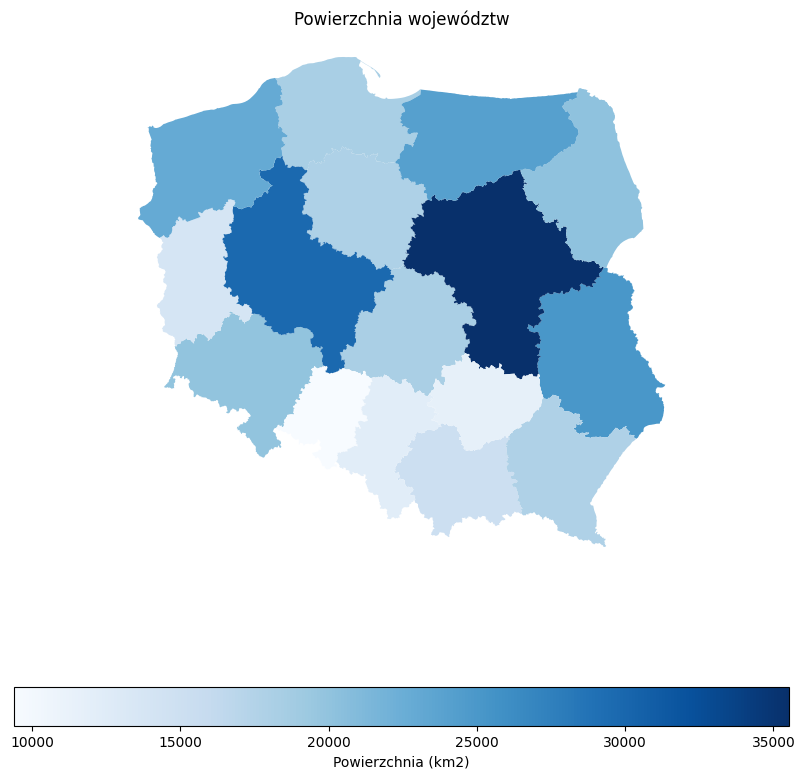

In [54]:
# Wizualizacja
def format_legend(x, pos):
  return f"{x/1000000:.0f}"
fig, ax = plt.subplots(figsize=(10, 10))
voivodeships.plot(ax=ax, column='Pole', cmap='Blues', legend=True, legend_kwds={"label": "Powierzchnia (km2)", "orientation": "horizontal", "format": FuncFormatter(format_legend)})
plt.title('Powierzchnia województw')
ax.set_axis_off()
plt.show()

#### c) Odległość miast od Krakowa
Korzystając z funkcji `geopandas.GeoSeries.distance()` zmierz odległość poszczególnych miast od Krakowa w metrach oraz:
 - zapisz wyniki do tablicy `cities` w kolumnie o nazwie "Odległość od Krakowa",
 - oblicz w jakiej odległości od Krakowa w kilometrach leży Poznań i zapisz wynik do zmiennej `distance`,
 - korzystając z funkcji `print()` wyświetl odpowiedź na pytanie (pełnym zdaniem) w jakiej odległości wyrażonej w kilometrach od Krakowa leży Poznań,
 - przygotuj wizualiację, na której kolor przypisany miastom jest powiązany z ich odległością od Krakowa.

Wizualizacja powinna zawierać:
- kontury województw, bez wypełnienia,
- lokalicaje miast, których kolor jest powiązany z ich odległością od Krakowa (ciągła skala kolorów).

Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [55]:
# Obliczenia
krakow = cities[cities['Nazwa'] == 'Kraków'].geometry.iloc[0]
cities['Odległość od Krakowa'] = cities.geometry.distance(krakow)
distance = cities[cities['Nazwa'] == 'Poznań'].geometry.iloc[0].distance(krakow) / 1000
print(distance)
cities.head()

334.60495145299524


,Nazwa,geometry,Odległość od Krakowa
325,Aleksandrów Kujawski,POINT (479373.05 556833.54),324646.944330
326,Aleksandrów Łódzki,POINT (520933.51 439274.23),200401.493101
390,Alwernia,POINT (538609.78 243752.61),28466.435299
447,Andrychów,POINT (524250.26 220924.61),48765.206388
580,Annopol,POINT (700882.16 339274.92),164115.126047


In [56]:
# Komórka testowa
assert np.isclose(cities["Odległość od Krakowa"].min(), 0.0)
assert np.isclose(cities["Odległość od Krakowa"].max(), 579020.726082644)
assert np.isclose(cities["Odległość od Krakowa"].mean(), 271127.08178774477)
assert np.isclose(distance, 334.60495145299524)

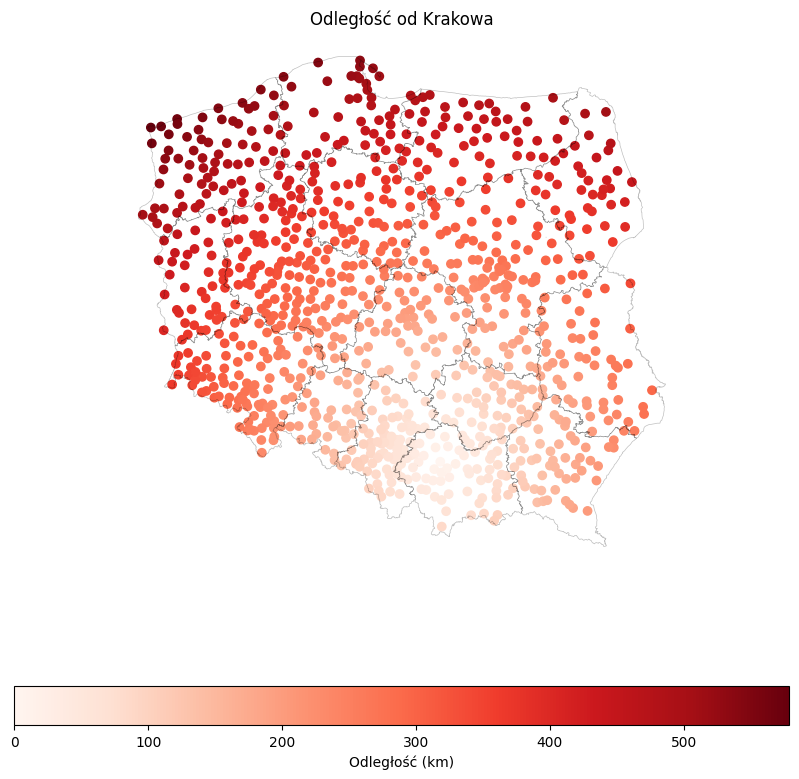

In [57]:
# Wizualizacja
def format_legend(x, pos):
  return f"{x/1000:.0f}"
fig, ax = plt.subplots(figsize=(10, 10))
cities.plot(ax=ax, column='Odległość od Krakowa', cmap='Reds', legend=True, legend_kwds={"label": "Odległość (km)", "orientation": "horizontal", "format": FuncFormatter(format_legend)})
voivodeships.plot(ax=ax, facecolor='None', linewidth=0.5, alpha=0.25)
plt.title('Odległość od Krakowa')
ax.set_axis_off()
plt.show()